# ロジスティック回帰の描画
2値分類の描画

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_x=np.array([
    [153,432],
    [220,262],
    [118,214],
    [474,384],
    [485,411],
    [233,430],
    [396,361],
    [484,349],
    [429,256],
    [286,220],
    [399,433],
    [403,340],
    [252,34],
    [497,472],
    [379,416],
    [76,163],
    [263,112],
    [26,193],
    [61,473],
    [420,253]
])

In [4]:
train_y=np.array([0,0,0,1,1,0,1,1,1,1,0,1,1,1,0,0,1,0,0,1])

In [5]:
print(np.sum(train_y==0))
print(np.sum(train_y==1))

9
11


In [6]:
# 標準化（平均０、標準偏差１）
def standardize(x):
    return (x-train_x.mean(axis=0))/train_x.std(axis=0)

In [7]:
train_str_x=standardize(train_x)

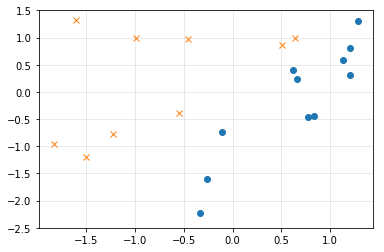

In [8]:
plt.plot(train_str_x[train_y==1,0],train_str_x[train_y==1,1],"o")
plt.plot(train_str_x[train_y==0,0],train_str_x[train_y==0,1],"x")
plt.ylim(-2.5,1.5)
plt.grid(color='gray', alpha=0.2)
plt.show()

In [9]:
def to_matrix(x):
    x0=np.ones([x.shape[0],1])
    return np.concatenate((x0,x),axis=1)

In [10]:
X=to_matrix(train_str_x)
X

array([[ 1.        , -0.99163844,  0.98368742],
       [ 1.        , -0.54781896, -0.39153348],
       [ 1.        , -1.22348444, -0.77983115],
       [ 1.        ,  1.13472054,  0.59538976],
       [ 1.        ,  1.20758642,  0.81380719],
       [ 1.        , -0.46170474,  0.96750835],
       [ 1.        ,  0.61803518,  0.40933046],
       [ 1.        ,  1.20096225,  0.31225604],
       [ 1.        ,  0.83663283, -0.44007069],
       [ 1.        , -0.11062366, -0.73129394],
       [ 1.        ,  0.63790769,  0.99177696],
       [ 1.        ,  0.66440438,  0.23945023],
       [ 1.        , -0.33584548, -2.2359474 ],
       [ 1.        ,  1.28707648,  1.30726881],
       [ 1.        ,  0.50542427,  0.85425487],
       [ 1.        , -1.50169963, -1.19239742],
       [ 1.        , -0.2629796 , -1.60496369],
       [ 1.        , -1.83290819, -0.94971138],
       [ 1.        , -1.6010622 ,  1.31535835],
       [ 1.        ,  0.77701529, -0.46433929]])

In [11]:
# シグモイド関数
def sigmoid(x):
    return 1/(1+np.exp(-np.dot(x,theta)))
    

In [12]:
# 平均２乗誤差
def mse(x,y):
    return (1/x.shape[0])*np.sum((y-f(x))**2)

In [13]:
# 学習率
alpha=0.001
# 反復回数
iteration=1000

In [14]:
# パラメーター初期化
np.random.seed(0)
theta=np.random.randn(X.shape[1])

acc_list=[]

for i in range(iteration):
    theta=theta-alpha*np.dot(sigmoid(X)-train_y,X)
    mse=(1/X.shape[0])*np.sum((train_y-sigmoid(X))**2)
    acc=np.sum((sigmoid(X)>0.5).astype(np.int)==train_y)/len(train_y)
    acc_list.append(acc)
    
    #log="{}/{} ： mse={:.3f}, acc={:.3f}"
    #print(log.format(i+1,iteration,mse,acc))



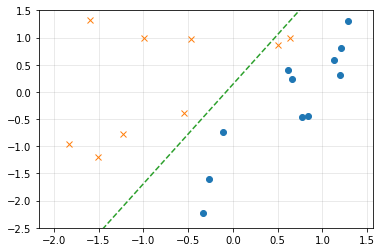

In [15]:
# ロジスティック回帰では sigmoid(x)=0.5のとき、つまり np.dot(x,theta)=0 が決定境界になる
x=np.arange(-2,1.5,0.1)
plt.plot(train_str_x[train_y==1,0],train_str_x[train_y==1,1],"o")
plt.plot(train_str_x[train_y==0,0],train_str_x[train_y==0,1],"x")
plt.plot(x,-(theta[0]+theta[1]*x)/theta[2],linestyle="dashed")
plt.ylim(-2.5,1.5)
plt.grid(color='gray', alpha=0.2)
plt.show()

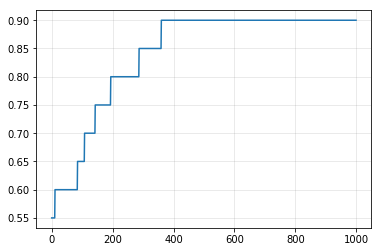

In [16]:
iter=np.arange(len(acc_list))
plt.plot(iter, acc_list)
plt.grid(color='gray', alpha=0.2)
plt.show()

In [17]:
train_str_x[:,0,None]**2

array([[0.9833468 ],
       [0.30010562],
       [1.49691416],
       [1.2875907 ],
       [1.45826497],
       [0.21317127],
       [0.38196748],
       [1.44231033],
       [0.6999545 ],
       [0.01223759],
       [0.40692623],
       [0.44143318],
       [0.11279219],
       [1.65656586],
       [0.25545369],
       [2.25510178],
       [0.06915827],
       [3.35955245],
       [2.56340016],
       [0.60375276]])

In [18]:
X=np.concatenate((X,train_str_x[:,0,None]**2),axis=1)

In [19]:
X

array([[ 1.        , -0.99163844,  0.98368742,  0.9833468 ],
       [ 1.        , -0.54781896, -0.39153348,  0.30010562],
       [ 1.        , -1.22348444, -0.77983115,  1.49691416],
       [ 1.        ,  1.13472054,  0.59538976,  1.2875907 ],
       [ 1.        ,  1.20758642,  0.81380719,  1.45826497],
       [ 1.        , -0.46170474,  0.96750835,  0.21317127],
       [ 1.        ,  0.61803518,  0.40933046,  0.38196748],
       [ 1.        ,  1.20096225,  0.31225604,  1.44231033],
       [ 1.        ,  0.83663283, -0.44007069,  0.6999545 ],
       [ 1.        , -0.11062366, -0.73129394,  0.01223759],
       [ 1.        ,  0.63790769,  0.99177696,  0.40692623],
       [ 1.        ,  0.66440438,  0.23945023,  0.44143318],
       [ 1.        , -0.33584548, -2.2359474 ,  0.11279219],
       [ 1.        ,  1.28707648,  1.30726881,  1.65656586],
       [ 1.        ,  0.50542427,  0.85425487,  0.25545369],
       [ 1.        , -1.50169963, -1.19239742,  2.25510178],
       [ 1.        , -0.

In [20]:
# 学習率
alpha=0.001
# 反復回数
iteration=1000

# パラメーター初期化
np.random.seed(0)
theta=np.random.randn(X.shape[1])

acc_list=[]

for i in range(iteration):
    theta=theta-alpha*np.dot(sigmoid(X)-train_y,X)
    mse=(1/X.shape[0])*np.sum((train_y-sigmoid(X))**2)
    acc=np.sum((sigmoid(X)>0.5).astype(np.int)==train_y)/len(train_y)
    acc_list.append(acc)
    
    #log="{}/{} ： mse={:.3f}, acc={:.3f}"
    #print(log.format(i+1,iteration,mse,acc))

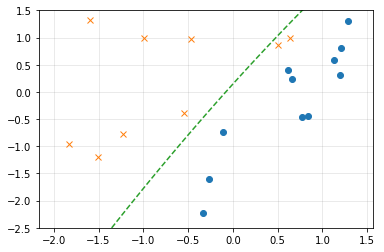

In [21]:
# ロジスティック回帰では sigmoid(x)=0.5のとき、つまり np.dot(x,theta)=0 が決定境界になる
x=np.arange(-2,1.5,0.1)
plt.plot(train_str_x[train_y==1,0],train_str_x[train_y==1,1],"o")
plt.plot(train_str_x[train_y==0,0],train_str_x[train_y==0,1],"x")
plt.plot(x,-(theta[0]+theta[1]*x+theta[3]*x**2)/theta[2],linestyle="dashed")
plt.ylim(-2.5,1.5)
plt.grid(color='gray', alpha=0.2)
plt.show()

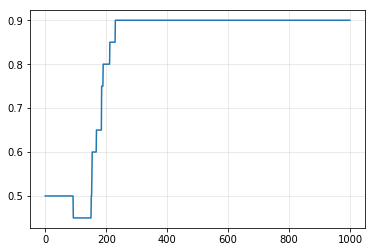

In [22]:
iter=np.arange(len(acc_list))
plt.plot(iter, acc_list)
plt.grid(color='gray', alpha=0.2)
plt.show()